<a href="https://colab.research.google.com/github/charlizecodes/general-project-fall25/blob/main/Charlize_Caretech_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TODO: Import libraries required here
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

MNIST dataset is like the hello world of machine learning!
in this part you're preparing the data for your CNN.
MNIST is a large database of handwritten digits.


mnist.load_data() downloads training images and testing images and loads into
four NumPy arrays.
x_train -> training images
y_train -> training labels
x_test -> the testing images
y_test -> the testing labels


Here you're basically Scaling or Normalizing your data, you're dividing every
pixel value by 255 so you can scale your range down. Since each pixel has a
value that ranges from 0 - 255 (intensity wise, 0 being black, 255 being white)
Learning is much faster when the values are small and consistent.


In [6]:
# Using MNIST dataset: 28x28 grayscale images
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


# Normalize pixel values to range [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add channel dimension
'''
this prepares the image data for the first conv2D layer in the CNN, because the
images are 2D when first loaded, the array shape is (number of images, 28,28).

For Conv2d, adding a dimension typically refers to the
batch dimension, which is required to process multiple images simultaneously and
train the model efficiently.

A Conv2d layer expects a 4D input tensor, with the
dimensions typically corresponding to (batch_size, height, width, channels)
depending on the framework.

'''
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)
# Each image is 28×28 pixels, grayscale (1 channel).
# Normalization helps the model learn faster.
'''
the output shows 60 000 batch size for the training set, with 28x28 height and
width, and 1 channel dimension which was added successfully

The channel dimension refers to the last dimension of an image tensor, which
defines the different layers of color or intensity information captured for
each pixel.

In the context of CNNs, it tells the model what kind of visual information it is
processing for the image:
'''


Training set shape: (60000, 28, 28, 1)
Test set shape: (10000, 28, 28, 1)


'\nthe output shows 60 000 batch size for the training set, with 28x28 height and \nwidth, and 1 channel dimension which was added successfully \n\nThe channel dimension refers to the last dimension of an image tensor, which \ndefines the different layers of color or intensity information captured for \neach pixel.\n\nIn the context of CNNs, it tells the model what kind of visual information it is\nprocessing for the image:\n'

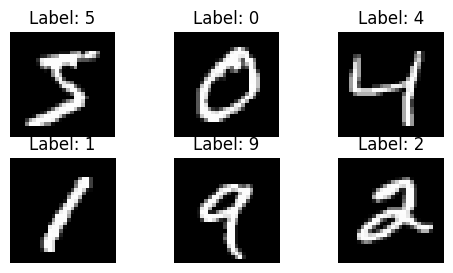

In [7]:
# Show images
plt.figure(figsize=(6,3))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

# What do you notice about how similar some digits look?
# Things to think about: What do you notice about how similar some digits look?

Conv2D is the core of convolutional neural networks
This conv2d is a set of learnable filters (also called kernels). For the first layer, you are using 32 filters, each 3x3 pixels in size.
- each filter slides across the image to recognize features (vertical edge, corner, textures)
- creates a feature map that highlights where these specific features are
- The first Conv2D layer learns low-level features (edges, lines). The second Conv2D layer learns more complex, high-level features (curves, loops, parts of digits) by looking at the features found by the first layer.

In [8]:
#Building a simple CNN

'''
this is where we import tensorflow's building blocks and organizational structures
for creatins CNNs within tensorflow ecosystem

the layers and models
Sequential is a class that defines and structures the neural network.
it is used to create a linear stack of layers where data flows sequentially from
one layer to the next. It is for simple, feed-forward networks (a type of AI
where info flows in a single one-way direction from the input layer, through any
hidden layers to the output layer without any cycles or loops)
'''

model = models.Sequential([
    # TODO: Add first Conv2D layer (32 filters, 3x3 kernel, 'relu', input_shape=(28,28,1))
    # find simple features like edges lines and corners
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),

    # TODO: Add MaxPooling layer (2x2)
    # it reduces the spacial dimensions of the feature maps by factor of 2
    # allows for the model to learn faster be be less sensi to the exact
    # location of features

    layers.MaxPooling2D((2,2)),

    # TODO: Add second Conv2D layer (64 filters, 3x3, 'relu')
    # uses 64 filters and looks at features in the first layer, finds complex
    # features by combining simpler features
    layers.Conv2D(64,(3,3),activation='relu'),

    # TODO: Add second MaxPooling layer
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),

    # TODO: Add Dense layer with 64 units, 'relu' activation
    layers.Dense(64, activation='relu'),

    # TODO: Add final Dense layer with 10 units, 'softmax' activation
    layers.Dense(10, activation='softmax')
])

model.summary()

# Exercise:
# Why do early layers detect edges and later layers detect shapes? Discuss.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Compile the Model

# TODO: Compile the model using:
# optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']
# model.compile(...)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.9012 - loss: 0.3180 - val_accuracy: 0.9847 - val_loss: 0.0483
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9845 - loss: 0.0484 - val_accuracy: 0.9880 - val_loss: 0.0374
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.9911 - loss: 0.0295 - val_accuracy: 0.9883 - val_loss: 0.0327
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9934 - loss: 0.0212 - val_accuracy: 0.9903 - val_loss: 0.0307
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9952 - loss: 0.0149 - val_accuracy: 0.9896 - val_loss: 0.0328


In [10]:
# Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.3f}")
# TODO: Evaluate test accuracy
# test_loss, test_acc = model.evaluate(...)

print(f"\nTest accuracy: {test_acc:.3f}")

313/313 - 3s - 8ms/step - accuracy: 0.9896 - loss: 0.0328

Test accuracy: 0.990

Test accuracy: 0.990


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


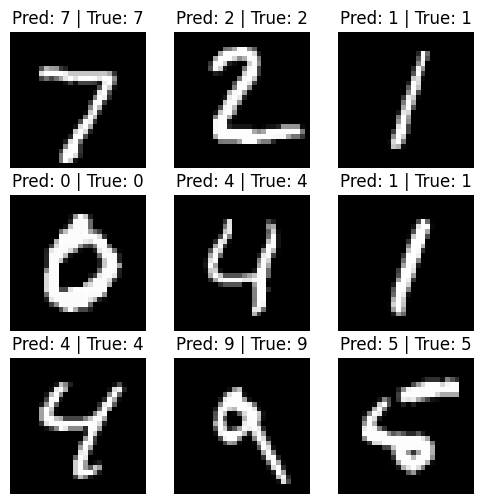

In [11]:
# Make Predictions
predictions = model.predict(x_test[:9])

plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.title(f"Pred: {predictions[i].argmax()} | True: {y_test[i]}")
    plt.axis('off')
plt.show()
# TODO: Predict the first 9 test images
# predictions = model.predict(...)

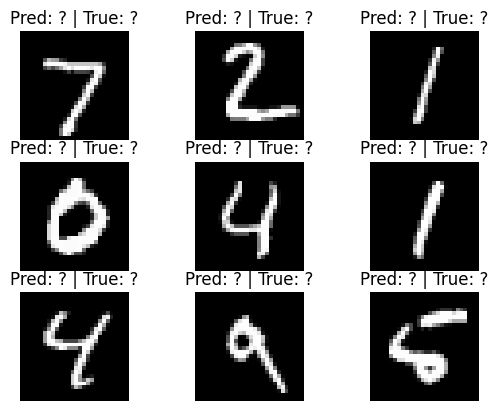

In [12]:
# Run this:
# plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    # TODO: Display predicted and true label
    plt.title(f"Pred: ? | True: ?")
    plt.axis('off')
plt.show()

# Exercise:
# What kind of patterns do you think the CNN looked at to decide each number?